In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

red = "#D81B60"
yellow = "#FFC107"
blue = "#1E88E5"
green = "#004D40"

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [2]:
# strudel_df = pd.read_csv('./results/strudel_results.csv')
df_0 = pd.read_csv('../results/estimate/magritte_0_results.csv')
df_1 = pd.read_csv('../results/estimate/magritte_1_results.csv')
df_2 = pd.read_csv('../results/estimate/magritte_2_results.csv')

magritte_df = pd.merge(df_0, df_1, on=('filename','target'), how='outer', suffixes=('_0', '_1'))
magritte_df = pd.merge(magritte_df, df_2, on=('filename','target'), how='outer', suffixes=('', '_2'))
magritte_df.rename(columns={'estimate':'estimate_2'}, inplace=True)

magritte_df["estimate"] = magritte_df[["estimate_0", "estimate_1", "estimate_2"]].mean(axis=1)
magritte_df = magritte_df[magritte_df["target"] > 0]
# change the column target to have a value of 1 for every value > 1
# magritte_df.loc[magritte_df['target'] > 1, 'target'] = 1
# print(magritte_df.loc[magritte_df['target']==1])

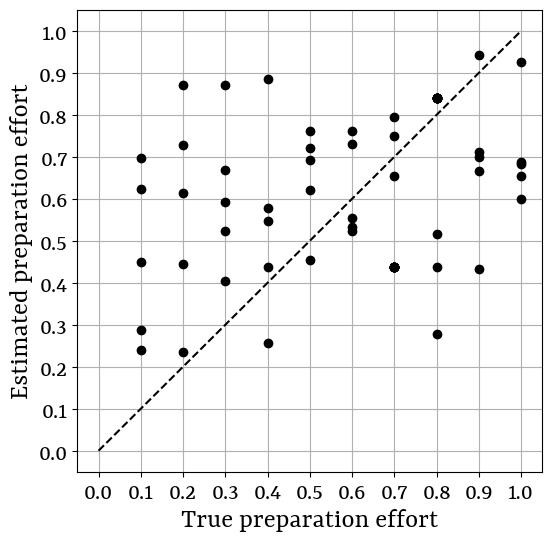

In [25]:
plt.rcParams['font.family'] = 'Rasa'
labelsize = 20

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(zorder=-10)
ax.set_axisbelow(True)
bins = [np.arange(-.05,1.15,.1), np.arange(-.05,1.15,.1)]
# ax.hist2d(magritte_df['target'], magritte_df["estimate"], cmap = "OrRd", bins = bins, zorder = -13)
x, y = magritte_df['target'], magritte_df["estimate"]
ax.scatter(x, y, label='Magritte', color="black")
m, b = np.polyfit(x, y, 1)
# ax.plot(x, 3*m*(x-0.4) + b, color="black", linestyle="-", label="Linear fit")
ax.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), color="black", linestyle="--", label="Linear fit")
# ax.scatter(y_true,y_pred, zorder=1)
# ticks = list(np.arange(0,1.1,0.1))
# ticklabels = [f"{tick:.1f}" for tick in ticks]
# ax.set_xticks(ticks=ticks, labels=ticklabels, size=labelsize-2);
# ax.set_yticks(ticks=ticks, labels=ticklabels, size=labelsize-2);

ax.set_xlabel("True preparation effort", size=labelsize)
ax.set_ylabel("Estimated preparation effort", size=labelsize)

ticks = list(np.arange(0,1.1,0.1))
ticklabels = [f"{tick:.1f}" for tick in ticks]
ax.set_xticks(ticks=ticks, labels=ticklabels, size=labelsize-2);
ax.set_yticks(ticks=ticks, labels=ticklabels, size=labelsize-2);

plt.savefig('estimate_results.png', dpi=300, bbox_inches='tight')

In [56]:
level = 0.2

print(magritte_df[magritte_df["target"]==level].filename.values)
display(magritte_df[magritte_df["target"]==level])


['fusepoolP3_p3-batchrefine_engines_inputs_osterie.csv'
 'GMDSP-Linked-Data_GenericStatsCube_ExampleStatsCube-data.csv'
 'Herrner_HOS-MetadataTransformations_data_02_transformed_dkrz_20230425_165103_03_add-columns.json.tsv'
 'Herrner_HOS-MetadataTransformations_data_02_transformed_tuhh-fdm_20230425_174556_03_add-columns.json.tsv'
 'LanLi2017_OR2YWTool_or2yw_examples_NYPL_dataset_Menupart.csv']


,filename,estimate_0,target,estimate_1,estimate_2,estimate
41,fusepoolP3_p3-batchrefine_engines_inputs_oster...,0.234253,0.2,0.234253,0.234253,0.234253
42,GMDSP-Linked-Data_GenericStatsCube_ExampleStat...,0.445312,0.2,0.445312,0.445312,0.445312
43,Herrner_HOS-MetadataTransformations_data_02_tr...,0.728027,0.2,0.727539,0.728027,0.727865
44,Herrner_HOS-MetadataTransformations_data_02_tr...,0.612793,0.2,0.612793,0.612793,0.612793
45,LanLi2017_OR2YWTool_or2yw_examples_NYPL_datase...,0.870117,0.2,0.870117,0.870117,0.870117


In [40]:
extended_df

,filename,estimate,target
0,alejandrofcarrera_DatathonMadrid16_source_data...,0.487305,1.0
1,alejandrofcarrera_DatathonMadrid16_source_data...,0.478271,1.0
2,alejandrofcarrera_DatathonMadrid16_source_data...,0.491943,1.0
3,alejandrofcarrera_DatathonMadrid16_source_data...,0.486084,1.0
4,alejandrofcarrera_DatathonMadrid16_source_data...,0.488770,0.7
...,...,...,...
2445,fusepoolP3_p3-transformer-configs_trentino-res...,0.480957,0.4
2446,fusepoolP3_p3-transformer-configs_trentino-res...,0.479736,0.8
2447,fusepoolP3_p3-transformer-configs_trentino-res...,0.488037,0.8
2448,fusepoolP3_p3-transformer-configs_trentino-res...,0.487793,0.8


Mendeley
F1 weighted:  0.41594261052469156
F1 macro:  0.14881392098736262
F1 micro:  0.3442282259588135
Per class F1 [0.62494854 0.00902256 0.         0.01398601 0.0879397  0.27086614
 0.0349345 ]
Troy
F1 weighted:  0.29395031483857753
F1 macro:  0.36999408371662484
F1 micro:  0.3052978150254415
Per class F1 [0.19500205 0.16862745 0.15686275 0.66666667 0.50064185 0.53216374]


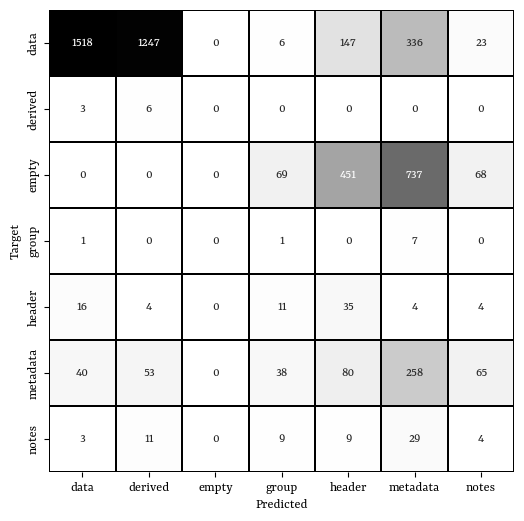

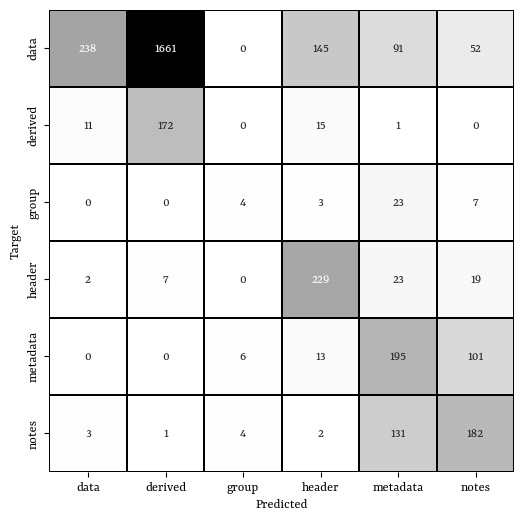

In [7]:
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(df):
#plot a confusion matrix between the predicted_delimiter and the target_delimiter columns
    y_pred = df[f"predicted"]
    y_true = df[f"label"]
    labels = sorted(y_true.unique())
    matrix = sklearn.metrics.confusion_matrix(y_true, y_pred, labels=labels)

    print("F1 weighted: ", sklearn.metrics.f1_score(y_true, y_pred, average="weighted"))
    print("F1 macro: ", sklearn.metrics.f1_score(y_true, y_pred, average="macro"))
    print("F1 micro: ", sklearn.metrics.f1_score(y_true, y_pred, average="micro"))
    print("Per class F1", sklearn.metrics.f1_score(y_true, y_pred, average=None))

    # draw matrix in matplotlib
    fig, ax  = plt.subplots(figsize=(6, 6))
    # im = ax.matshow(matrix, cmap=plt.cm.Blues, alpha)
    sns.heatmap(matrix, 
                cmap='binary', 
                # vmin=0,
                # vmax=100,
                linecolor='black',
                linewidths=.25,
                robust=True,
                xticklabels=labels, 
                yticklabels=labels, 
                annot=True, 
                fmt='d', 
                cbar=False, 
                )

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

print("Mendeley")
plot_cm(mendeley_df)

print("Troy")
plot_cm(troy_df)



In [19]:
mendeley_df.columns


Index(['Unnamed: 0', 'filename', 'line_number', 'data_prob', 'derived_prob',
       'group_prob', 'header_prob', 'metadata_prob', 'notes_prob', 'label',
       'predicted'],
      dtype='object')